### Problem Statement:

**Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.Build a machine learning model to predict the price of the flight ticket.** 

### Importing Required Library

In [63]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
import datetime
pd.set_option('Display.max_columns', None)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reading Data

In [2]:
df = pd.read_excel(r"C:\Users\Kushal Arya\Desktop\csv file\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Check no of row and column

In [3]:
print('No of Rows and Columns ----->', df.shape )

No of Rows and Columns -----> (10683, 11)


### Checking for Null values

In [3]:
print('================================\n')
print(df.isnull().sum())
print('\n================================')


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64



#### There is null value

### Drop NaN

In [4]:
df = df.dropna()

### Check NaN remove or not

In [5]:
print('================================\n')
print(df.isnull().sum())
print('\n================================')


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64



#### Nan are removed

### Information about dataset

In [6]:
print('==================================================\n')
print(df.info())
print('====================================================')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB
None


#### Categorical data present in our data set

### Checking For Duplicate 

In [7]:
duplicate = df[df.duplicated()]
print('==========================================================================')
print("Duplicate Rows :\n\n",duplicate)
print('==========================================================================')

Duplicate Rows :

            Airline Date_of_Journey    Source Destination  \
683    Jet Airways       1/06/2019     Delhi      Cochin   
1061     Air India      21/05/2019     Delhi      Cochin   
1348     Air India      18/05/2019     Delhi      Cochin   
1418   Jet Airways       6/06/2019     Delhi      Cochin   
1674        IndiGo      24/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10594  Jet Airways      27/06/2019     Delhi      Cochin   
10616  Jet Airways       1/06/2019     Delhi      Cochin   
10634  Jet Airways       6/06/2019     Delhi      Cochin   
10672  Jet Airways      27/06/2019     Delhi      Cochin   
10673  Jet Airways      27/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
683    DEL → NAG → BOM → COK    14:35  04:25 02 Jun  13h 50m     2 stops   
1061   DEL → GOI → BOM → COK    22:00  19:15 22 May  21h 15m     2 stops   
1348   DEL → HYD → BOM → COK    

### Droping Duplicates

In [8]:
df.drop_duplicates(keep=False,inplace=True)

In [9]:
print('After removing duplicates No of Rows and Columns  ----->', df.shape )

After removing duplicates No of Rows and Columns  -----> (10267, 11)


### Features Engineering

### Add Months Column

In [10]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [11]:
df['Months'] = df['Date_of_Journey'].dt.month
df['Months'] = df['Months'].astype('int')
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Months
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1


In [12]:
df['Months'].value_counts()

6     2403
3     2129
5     1984
9     1349
1     1043
12     935
4      424
Name: Months, dtype: int64

In [13]:
df['Months'].dtype

dtype('int32')

### Add Day Column

In [14]:
df['Day'] = df['Date_of_Journey'].dt.day
df['Day'] = df['Day'].astype('int')
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Months,Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [15]:
df['Day'].value_counts()

6     2064
5     1355
3     1328
21    1063
27    1057
24     996
15     952
18     799
4      653
Name: Day, dtype: int64

In [16]:
df['Day'].dtype

dtype('int32')

### Add New Arrival Column

In [17]:
df['Arrival_Time'].value_counts()

19:00           401
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
23:25 13 May      1
08:50 07 Mar      1
00:35 02 Mar      1
00:25 19 Mar      1
00:50 28 May      1
Name: Arrival_Time, Length: 1335, dtype: int64

In [18]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

In [19]:
df['NewArrival_Time'] = df['Arrival_Time'].dt.time
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Months,Day,NewArrival_Time
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,01:10:00
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2021-08-09 13:15:00,7h 25m,2 stops,No info,7662,1,5,13:15:00


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10267 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10267 non-null  object        
 1   Date_of_Journey  10267 non-null  datetime64[ns]
 2   Source           10267 non-null  object        
 3   Destination      10267 non-null  object        
 4   Route            10267 non-null  object        
 5   Dep_Time         10267 non-null  object        
 6   Arrival_Time     10267 non-null  datetime64[ns]
 7   Duration         10267 non-null  object        
 8   Total_Stops      10267 non-null  object        
 9   Additional_Info  10267 non-null  object        
 10  Price            10267 non-null  int64         
 11  Months           10267 non-null  int32         
 12  Day              10267 non-null  int32         
 13  NewArrival_Time  10267 non-null  object        
dtypes: datetime64[ns](2), int32(2), int64(

### Add New Departure Time column 

In [21]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])

In [22]:
df['NewDep_Time'] = df['Dep_Time'].dt.time
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Months,Day,NewArrival_Time,NewDep_Time
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-08-09 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,01:10:00,22:20:00
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-09 05:50:00,2021-08-09 13:15:00,7h 25m,2 stops,No info,7662,1,5,13:15:00,05:50:00


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10267 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10267 non-null  object        
 1   Date_of_Journey  10267 non-null  datetime64[ns]
 2   Source           10267 non-null  object        
 3   Destination      10267 non-null  object        
 4   Route            10267 non-null  object        
 5   Dep_Time         10267 non-null  datetime64[ns]
 6   Arrival_Time     10267 non-null  datetime64[ns]
 7   Duration         10267 non-null  object        
 8   Total_Stops      10267 non-null  object        
 9   Additional_Info  10267 non-null  object        
 10  Price            10267 non-null  int64         
 11  Months           10267 non-null  int32         
 12  Day              10267 non-null  int32         
 13  NewArrival_Time  10267 non-null  object        
 14  NewDep_Time      10267 non-null  objec

### Converting New Arrival Time and New Departure Time column in Minutes

In [24]:
df['Dep_Hours'] = df['Dep_Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)/60
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Months,Day,NewArrival_Time,NewDep_Time,Dep_Hours
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-08-09 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,01:10:00,22:20:00,1340.0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-09 05:50:00,2021-08-09 13:15:00,7h 25m,2 stops,No info,7662,1,5,13:15:00,05:50:00,350.0


In [25]:
df['Arrival_Hours'] = df['NewArrival_Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)/60
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Months,Day,NewArrival_Time,NewDep_Time,Dep_Hours,Arrival_Hours
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-08-09 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,01:10:00,22:20:00,1340.0,70.0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-09 05:50:00,2021-08-09 13:15:00,7h 25m,2 stops,No info,7662,1,5,13:15:00,05:50:00,350.0,795.0


### Split Duration column into Hours and Minutes

In [26]:
new = df['Duration'].str.split(' ', n = 2, expand = True)

In [27]:
df['Hours'] = new[0]
df['Minutes'] = new[1]
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Months,Day,NewArrival_Time,NewDep_Time,Dep_Hours,Arrival_Hours,Hours,Minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-08-09 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,01:10:00,22:20:00,1340.0,70.0,2h,50m
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-09 05:50:00,2021-08-09 13:15:00,7h 25m,2 stops,No info,7662,1,5,13:15:00,05:50:00,350.0,795.0,7h,25m


In [28]:
df['Hours'] = new[0].str.split('h', expand = True)
df['Minutes'] = new[1].str.split('m', expand = True)
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Months,Day,NewArrival_Time,NewDep_Time,Dep_Hours,Arrival_Hours,Hours,Minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-08-09 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,01:10:00,22:20:00,1340.0,70.0,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-09 05:50:00,2021-08-09 13:15:00,7h 25m,2 stops,No info,7662,1,5,13:15:00,05:50:00,350.0,795.0,7,25


In [29]:
df['Hours'] = df['Hours'].replace(['5m'],'5')

In [30]:
df['Hours'] =  df['Hours'].astype(np.float)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10267 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10267 non-null  object        
 1   Date_of_Journey  10267 non-null  datetime64[ns]
 2   Source           10267 non-null  object        
 3   Destination      10267 non-null  object        
 4   Route            10267 non-null  object        
 5   Dep_Time         10267 non-null  datetime64[ns]
 6   Arrival_Time     10267 non-null  datetime64[ns]
 7   Duration         10267 non-null  object        
 8   Total_Stops      10267 non-null  object        
 9   Additional_Info  10267 non-null  object        
 10  Price            10267 non-null  int64         
 11  Months           10267 non-null  int32         
 12  Day              10267 non-null  int32         
 13  NewArrival_Time  10267 non-null  object        
 14  NewDep_Time      10267 non-null  objec

In [32]:
df['Minutes'] = df['Minutes'].fillna(df['Minutes'].mode()[0])

In [33]:
df['Minutes'] =  df['Minutes'].astype(np.float)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10267 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10267 non-null  object        
 1   Date_of_Journey  10267 non-null  datetime64[ns]
 2   Source           10267 non-null  object        
 3   Destination      10267 non-null  object        
 4   Route            10267 non-null  object        
 5   Dep_Time         10267 non-null  datetime64[ns]
 6   Arrival_Time     10267 non-null  datetime64[ns]
 7   Duration         10267 non-null  object        
 8   Total_Stops      10267 non-null  object        
 9   Additional_Info  10267 non-null  object        
 10  Price            10267 non-null  int64         
 11  Months           10267 non-null  int32         
 12  Day              10267 non-null  int32         
 13  NewArrival_Time  10267 non-null  object        
 14  NewDep_Time      10267 non-null  objec

### Adding New Duration column

In [35]:
df['New_Duration'] = df['Hours']*60 + df['Minutes']
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Months,Day,NewArrival_Time,NewDep_Time,Dep_Hours,Arrival_Hours,Hours,Minutes,New_Duration
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-08-09 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,01:10:00,22:20:00,1340.0,70.0,2.0,50.0,170.0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-09 05:50:00,2021-08-09 13:15:00,7h 25m,2 stops,No info,7662,1,5,13:15:00,05:50:00,350.0,795.0,7.0,25.0,445.0


In [36]:
df['New_Duration'].value_counts()

170.0     538
90.0      386
165.0     333
155.0     329
175.0     327
         ... 
2135.0      1
2860.0      1
1810.0      1
2850.0      1
815.0       1
Name: New_Duration, Length: 340, dtype: int64

### Analysis of Data

### Airline column

In [37]:
ar = df['Airline'].value_counts()
ar

Jet Airways                          3569
IndiGo                               2033
Air India                            1644
Multiple carriers                    1196
SpiceJet                              812
Vistara                               477
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

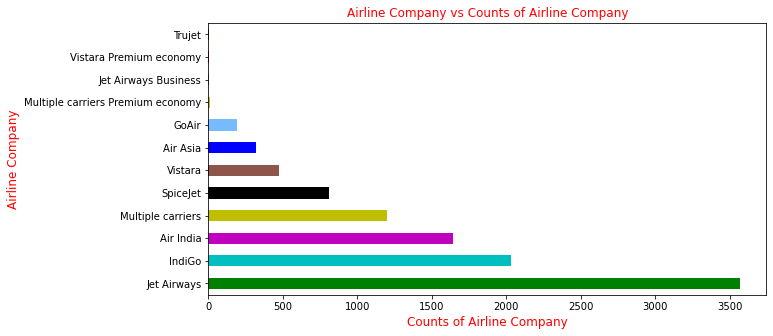

In [38]:
ar.plot.barh(figsize = (10,5), color = ['g','c', 'm', 'y','k','tab:brown','b','xkcd:sky blue','tab:olive','tab:gray','r'])
plt.ylabel('Airline Company', c = 'r', fontsize = 12)
plt.xlabel('Counts of Airline Company', c = 'r', fontsize = 12 )
plt.title('Airline Company vs Counts of Airline Company', c = 'r', fontsize = 12)
plt.show()

#### Above plot shows Jet Airways has highest and Trujet has lowest flight counts

In [39]:
air = df.groupby(['Airline','Months'])['Price'].sum().sort_values()
air

Airline                  Months
Trujet                   6            4140
Vistara Premium economy  6            5969
                         1            9125
                         3           11793
Multiple carriers        4           12186
                                    ...   
Jet Airways              1         5393640
                         9         5924281
                         3         6616650
                         5         8548865
                         6         9812957
Name: Price, Length: 64, dtype: int64

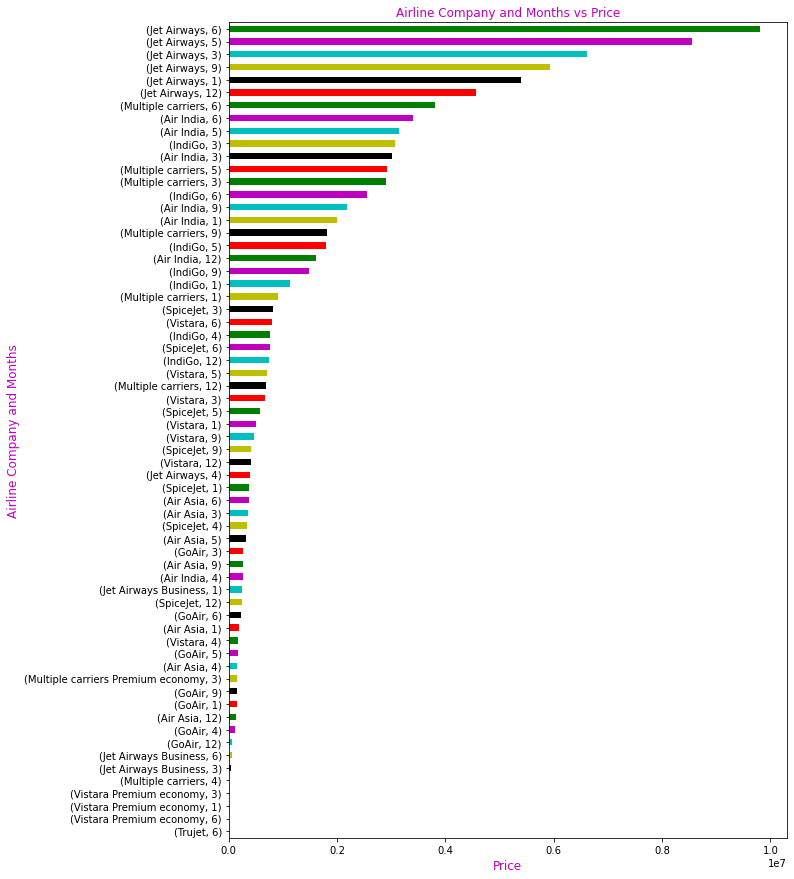

In [40]:
air.plot.barh(figsize = (10, 15),color = ['y','c', 'm', 'g','r','k'])
plt.ylabel('Airline Company and Months', c = 'm', fontsize = 12)
plt.xlabel('Price', c = 'm', fontsize = 12 )
plt.title('Airline Company and Months vs Price', c = 'm', fontsize = 12)
plt.show()

#### Above plot shows Jet Airways in 6th month has highest Price and Trujet has lowest

### Day column

In [42]:
d = df.groupby(['Day'])['Price'].sum().sort_values()
d

Day
4      3988043
18     6763741
15     7618163
24     8280403
27     8371368
21     8727727
5     11704710
3     17719024
6     18950402
Name: Price, dtype: int64

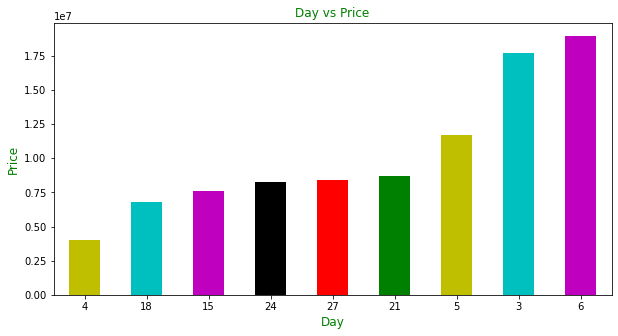

In [43]:
d.plot.bar(figsize = (10, 5),rot = 360, color = ['y','c', 'm', 'k','r','g'])
plt.xlabel('Day', c = 'g', fontsize = 12)
plt.ylabel('Price', c = 'g', fontsize = 12 )
plt.title('Day vs Price', c = 'g', fontsize = 12)
plt.show()

#### Above plot shows 6th day of every months has highest price and 4th is lowest price

In [44]:
day = df.groupby(['Airline', 'Day'])['Price'].sum().sort_values()
day

Airline                  Day
Trujet                   3         4140
Vistara Premium economy  4         5969
                         3        20918
GoAir                    18       63639
                         21       73654
                                 ...   
Jet Airways              24     3726006
                         21     3925266
                         5      6346158
                         3      7072860
                         6      9171123
Name: Price, Length: 77, dtype: int64

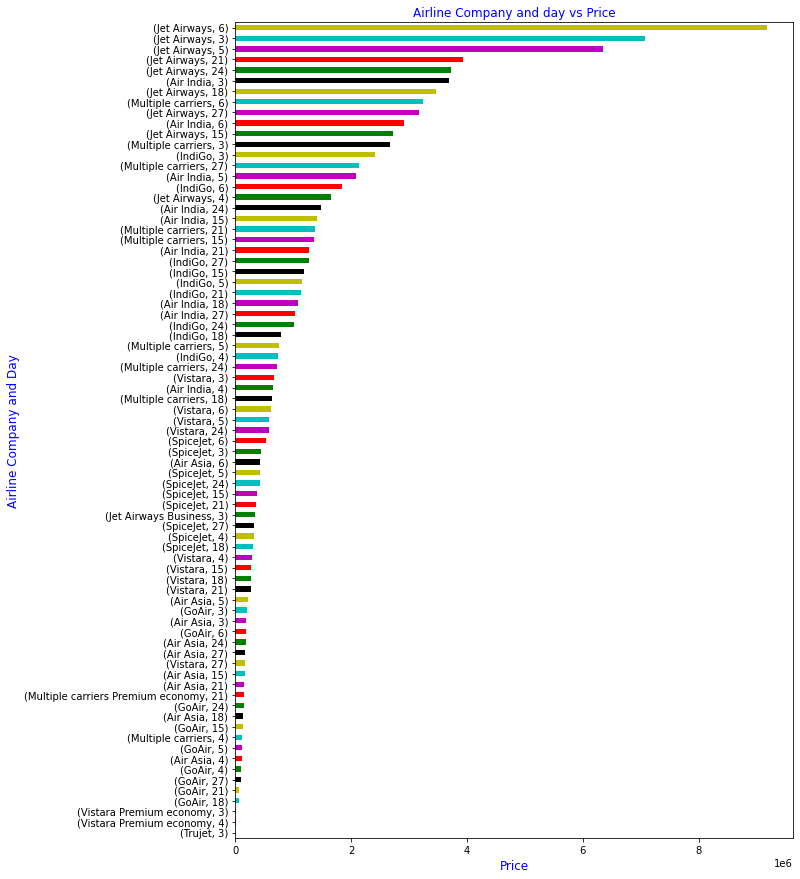

In [45]:
day.plot.barh(figsize = (10, 15),color = ['g','r', 'm', 'c','y','k'])
plt.ylabel('Airline Company and Day', c = 'b', fontsize = 12)
plt.xlabel('Price', c = 'b', fontsize = 12 )
plt.title('Airline Company and day vs Price', c = 'b', fontsize = 12)
plt.show()

#### Above plot shows Jet Airways 6th day of every months has highest price

### Route column

In [46]:
df['Source'].value_counts()

Delhi       4178
Kolkata     2850
Banglore    2161
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [47]:
source = df.groupby(['Source','Destination'])['Price'].sum()
source

Source    Destination
Banglore  Delhi           6507057
          New Delhi      10842254
Chennai   Kolkata         1824949
Delhi     Cochin         43402838
Kolkata   Banglore       26019866
Mumbai    Hyderabad       3526617
Name: Price, dtype: int64

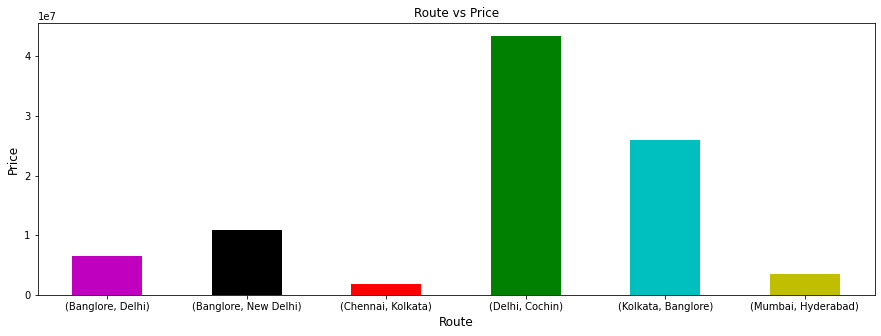

In [48]:
source.plot.bar(figsize = (15, 5),rot = 360, color = ['m','k','r','g','c','y'])
plt.ylabel('Price', c = 'k', fontsize = 12)
plt.xlabel('Route', c = 'k', fontsize = 12 )
plt.title('Route vs Price', c = 'k', fontsize = 12)
plt.show()

#### Above plot shows Delhi to Cochin has highest price and Chennai to Kolkata has lowest price

### Total Stops column

In [49]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3459
2 stops     1141
3 stops       41
4 stops        1
Name: Total_Stops, dtype: int64

In [50]:
tstop = df.groupby('Total_Stops')['Price'].sum()
tstop

Total_Stops
1 stop      59591945
2 stops     14626877
3 stops       550378
4 stops        17686
non-stop    17336695
Name: Price, dtype: int64

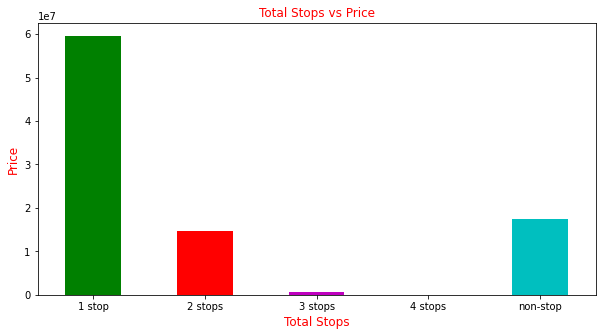

In [51]:
tstop.plot.bar(figsize = (10, 5),rot = 360, color = ['g','r', 'm', 'y','c'])
plt.xlabel('Total Stops', c = 'r', fontsize = 12)
plt.ylabel('Price', c = 'r', fontsize = 12 )
plt.title('Total Stops vs Price', c = 'r', fontsize = 12)
plt.show()

#### Above plot shows 1 stop flight has highest price and 4 stop has lowest price

### New Duration column

In [52]:
df['New_Duration'].value_counts()

170.0     538
90.0      386
165.0     333
155.0     329
175.0     327
         ... 
2135.0      1
2860.0      1
1810.0      1
2850.0      1
815.0       1
Name: New_Duration, Length: 340, dtype: int64

In [53]:
info = df.groupby('New_Duration')['Price'].sum().sort_values()
info

New_Duration
250.0        4226
1815.0       7664
1675.0       7932
235.0        8452
820.0        8518
           ...   
155.0     1579634
210.0     1589224
165.0     1843638
175.0     1850293
170.0     2687754
Name: Price, Length: 340, dtype: int64

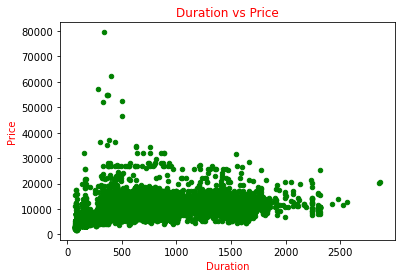

In [54]:
df.plot.scatter(x = 'New_Duration', y = 'Price', c = 'g')
plt.xlabel('Duration', c = 'r')
plt.ylabel('Price', c = 'r')
plt.title('Duration vs Price', c = 'r')
plt.show()

#### Above plot shows Price increase respact to Duration

### Deleate Unwanted Columns

In [41]:
col = ['Date_of_Journey','Dep_Time','Arrival_Time','Duration']

In [42]:
df = df.drop(col, axis = 1)
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Months,Day,NewArrival_Time,NewDep_Time,Dep_Hours,Arrival_Hours,Hours,Minutes,New_Duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,01:10:00,22:20:00,1340.0,70.0,2.0,50.0,170.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13:15:00,05:50:00,350.0,795.0,7.0,25.0,445.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10267 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10267 non-null  object 
 1   Source           10267 non-null  object 
 2   Destination      10267 non-null  object 
 3   Route            10267 non-null  object 
 4   Total_Stops      10267 non-null  object 
 5   Additional_Info  10267 non-null  object 
 6   Price            10267 non-null  int64  
 7   Months           10267 non-null  int32  
 8   Day              10267 non-null  int32  
 9   NewArrival_Time  10267 non-null  object 
 10  NewDep_Time      10267 non-null  object 
 11  Dep_Hours        10267 non-null  float64
 12  Arrival_Hours    10267 non-null  float64
 13  Hours            10267 non-null  float64
 14  Minutes          10267 non-null  float64
 15  New_Duration     10267 non-null  float64
dtypes: float64(5), int32(2), int64(1), object(8)
memory usage:

### Filter Categorical features

In [44]:
numerics = ['int64','int32','float64']
categorical_col = []
features = df.columns.values.tolist()
for col in features:
    if df[col].dtype in numerics:
        continue
    categorical_col.append(col)

### Encodinng Categorical columns

In [45]:
df_dummies = pd.get_dummies(df[categorical_col], drop_first = True)
df_dummies.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_BLR → BBI → DEL,Route_BLR → BDQ → DEL,Route_BLR → BOM → AMD → DEL,Route_BLR → BOM → BHO → DEL,Route_BLR → BOM → DEL,Route_BLR → BOM → IDR → DEL,Route_BLR → BOM → IDR → GWL → DEL,Route_BLR → BOM → IXC → DEL,Route_BLR → BOM → JDH → DEL,Route_BLR → BOM → NAG → DEL,Route_BLR → BOM → UDR → DEL,Route_BLR → CCU → BBI → DEL,Route_BLR → CCU → BBI → HYD → DEL,Route_BLR → CCU → BBI → HYD → VGA → DEL,Route_BLR → CCU → DEL,Route_BLR → CCU → GAU → DEL,Route_BLR → COK → DEL,Route_BLR → DEL,Route_BLR → GAU → DEL,Route_BLR → GOI → DEL,Route_BLR → HBX → BOM → AMD → DEL,Route_BLR → HBX → BOM → BHO → DEL,Route_BLR → HBX → BOM → NAG → DEL,Route_BLR → HYD → DEL,Route_BLR → HYD → VGA → DEL,Route_BLR → IDR → DEL,Route_BLR → LKO → DEL,Route_BLR → MAA → DEL,Route_BLR → NAG → DEL,Route_BLR → PNQ → DEL,Route_BLR → STV → DEL,Route_BLR → TRV → COK → DEL,Route_BLR → VGA → DEL,Route_BLR → VGA → HYD → DEL,Route_BLR → VGA → VTZ → DEL,Route_BOM → AMD → ISK → HYD,Route_BOM → BBI → HYD,Route_BOM → BDQ → DEL → HYD,Route_BOM → BHO → DEL → HYD,Route_BOM → BLR → CCU → BBI → HYD,Route_BOM → BLR → HYD,Route_BOM → CCU → HYD,Route_BOM → COK → MAA → HYD,Route_BOM → DED → DEL → HYD,Route_BOM → DEL → HYD,Route_BOM → GOI → HYD,Route_BOM → GOI → PNQ → HYD,Route_BOM → HYD,Route_BOM → IDR → DEL → HYD,Route_BOM → JAI → DEL → HYD,Route_BOM → JDH → DEL → HYD,Route_BOM → JDH → JAI → DEL → HYD,Route_BOM → JLR → HYD,Route_BOM → MAA → HYD,Route_BOM → NDC → HYD,Route_BOM → RPR → VTZ → HYD,Route_BOM → UDR → DEL → HYD,Route_BOM → VNS → DEL → HYD,Route_CCU → AMD → BLR,Route_CCU → BBI → BLR,Route_CCU → BBI → BOM → BLR,Route_CCU → BBI → HYD → BLR,Route_CCU → BBI → IXR → DEL → BLR,Route_CCU → BLR,Route_CCU → BOM → AMD → BLR,Route_CCU → BOM → BLR,Route_CCU → BOM → COK → BLR,Route_CCU → BOM → GOI → BLR,Route_CCU → BOM → HBX → BLR,Route_CCU → BOM → PNQ → BLR,Route_CCU → BOM → TRV → BLR,Route_CCU → DEL → AMD → BLR,Route_CCU → DEL → BLR,Route_CCU → DEL → COK → BLR,Route_CCU → DEL → COK → TRV → BLR,Route_CCU → DEL → VGA → BLR,Route_CCU → GAU → BLR,Route_CCU → GAU → DEL → BLR,Route_CCU → GAU → IMF → DEL → BLR,Route_CCU → HYD → BLR,Route_CCU → IXA → BLR,Route_CCU → IXB → BLR,Route_CCU → IXB → DEL → BLR,Route_CCU → IXR → BBI → BLR,Route_CCU → IXR → DEL → BLR,Route_CCU → IXZ → MAA → BLR,Route_CCU → JAI → BOM → BLR,Route_CCU → JAI → DEL → BLR,Route_CCU → KNU → BLR,Route_CCU → MAA → BLR,Route_CCU → NAG → BLR,Route_CCU → PAT → BLR,Route_CCU → PNQ → BLR,Route_CCU → RPR → HYD → BLR,Route_CCU → VNS → DEL → BLR,Route_CCU → VTZ → BLR,Route_DEL → AMD → BOM → COK,Route_DEL → AMD → COK,Route_DEL → ATQ → BOM → COK,Route_DEL → BBI → COK,Route_DEL → BDQ → BOM → COK,Route_DEL → BHO → BOM → COK,Route_DEL → BLR → COK,Route_DEL → BOM → COK,Route_DEL → CCU → BOM → COK,Route_DEL → COK,Route_DEL → DED → BOM → COK,Route_DEL → GOI → BOM → COK,Route_DEL → GWL → IDR → BOM → COK,Route_DEL → HYD → BOM → COK,Route_DEL → HYD → COK,Route_DEL → HYD → MAA → COK,Route_DEL → IDR → BOM → COK,Route_DEL → IXC → BOM → COK,Route_DEL → IXU → BOM → COK,Route_DEL → JAI → BOM → COK,Route_DEL → JDH → BOM → COK,Route_DEL → LKO → BOM → COK,Route_DEL → LKO → COK,Route_DEL → MAA → BOM → COK,Route_DEL → MAA → COK,Route_DEL → NAG → BOM → COK,Route_DEL → PNQ → COK,Route_DEL → RPR → NAG → BOM → COK,Route_DEL → TRV → COK,Route_DEL → UDR → BOM → COK,Route_MAA → CCU,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No

In [46]:
df_dummies.shape

(10267, 603)

In [47]:
df = df.join(df_dummies)
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Months,Day,NewArrival_Time,NewDep_Time,Dep_Hours,Arrival_Hours,Hours,Minutes,New_Duration,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_BLR → BBI → DEL,Route_BLR → BDQ → DEL,Route_BLR → BOM → AMD → DEL,Route_BLR → BOM → BHO → DEL,Route_BLR → BOM → DEL,Route_BLR → BOM → IDR → DEL,Route_BLR → BOM → IDR → GWL → DEL,Route_BLR → BOM → IXC → DEL,Route_BLR → BOM → JDH → DEL,Route_BLR → BOM → NAG → DEL,Route_BLR → BOM → UDR → DEL,Route_BLR → CCU → BBI → DEL,Route_BLR → CCU → BBI → HYD → DEL,Route_BLR → CCU → BBI → HYD → VGA → DEL,Route_BLR → CCU → DEL,Route_BLR → CCU → GAU → DEL,Route_BLR → COK → DEL,Route_BLR → DEL,Route_BLR → GAU → DEL,Route_BLR → GOI → DEL,Route_BLR → HBX → BOM → AMD → DEL,Route_BLR → HBX → BOM → BHO → DEL,Route_BLR → HBX → BOM → NAG → DEL,Route_BLR → HYD → DEL,Route_BLR → HYD → VGA → DEL,Route_BLR → IDR → DEL,Route_BLR → LKO → DEL,Route_BLR → MAA → DEL,Route_BLR → NAG → DEL,Route_BLR → PNQ → DEL,Route_BLR → STV → DEL,Route_BLR → TRV → COK → DEL,Route_BLR → VGA → DEL,Route_BLR → VGA → HYD → DEL,Route_BLR → VGA → VTZ → DEL,Route_BOM → AMD → ISK → HYD,Route_BOM → BBI → HYD,Route_BOM → BDQ → DEL → HYD,Route_BOM → BHO → DEL → HYD,Route_BOM → BLR → CCU → BBI → HYD,Route_BOM → BLR → HYD,Route_BOM → CCU → HYD,Route_BOM → COK → MAA → HYD,Route_BOM → DED → DEL → HYD,Route_BOM → DEL → HYD,Route_BOM → GOI → HYD,Route_BOM → GOI → PNQ → HYD,Route_BOM → HYD,Route_BOM → IDR → DEL → HYD,Route_BOM → JAI → DEL → HYD,Route_BOM → JDH → DEL → HYD,Route_BOM → JDH → JAI → DEL → HYD,Route_BOM → JLR → HYD,Route_BOM → MAA → HYD,Route_BOM → NDC → HYD,Route_BOM → RPR → VTZ → HYD,Route_BOM → UDR → DEL → HYD,Route_BOM → VNS → DEL → HYD,Route_CCU → AMD → BLR,Route_CCU → BBI → BLR,Route_CCU → BBI → BOM → BLR,Route_CCU → BBI → HYD → BLR,Route_CCU → BBI → IXR → DEL → BLR,Route_CCU → BLR,Route_CCU → BOM → AMD → BLR,Route_CCU → BOM → BLR,Route_CCU → BOM → COK → BLR,Route_CCU → BOM → GOI → BLR,Route_CCU → BOM → HBX → BLR,Route_CCU → BOM → PNQ → BLR,Route_CCU → BOM → TRV → BLR,Route_CCU → DEL → AMD → BLR,Route_CCU → DEL → BLR,Route_CCU → DEL → COK → BLR,Route_CCU → DEL → COK → TRV → BLR,Route_CCU → DEL → VGA → BLR,Route_CCU → GAU → BLR,Route_CCU → GAU → DEL → BLR,Route_CCU → GAU → IMF → DEL → BLR,Route_CCU → HYD → BLR,Route_CCU → IXA → BLR,Route_CCU → IXB → BLR,Route_CCU → IXB → DEL → BLR,Route_CCU → IXR → BBI → BLR,Route_CCU → IXR → DEL → BLR,Route_CCU → IXZ → MAA → BLR,Route_CCU → JAI → BOM → BLR,Route_CCU → JAI → DEL → BLR,Route_CCU → KNU → BLR,Route_CCU → MAA → BLR,Route_CCU → NAG → BLR,Route_CCU → PAT → BLR,Route_CCU → PNQ → BLR,Route_CCU → RPR → HYD → BLR,Route_CCU → VNS → DEL → BLR,Route_CCU → VTZ → BLR,Route_DEL → AMD → BOM → COK,Route_DEL → AMD → COK,Route_DEL → ATQ → BOM → COK,Route_DEL → BBI → COK,Route_DEL → BDQ → BOM → COK,Route_DEL → BHO → BOM → COK,Route_DEL → BLR → COK,Route_DEL → BOM → COK,Route_DEL → CCU → BOM → COK,Route_DEL → COK,Route_DEL → DED → BOM → COK,Route_DEL → GOI → BOM → COK,Route_DEL → GWL → IDR → BOM → COK,Route_DEL → HYD → BOM → COK,Route_DEL → HYD → COK,Route_DEL → HYD → MAA → COK,Route_DEL → IDR → BOM → COK,Route_DEL → IXC → BOM → COK,Route_DEL → IXU → BOM → COK,Route_DEL → JAI → BOM → COK,Route_DEL → JDH → BOM → COK,Route_DEL → LKO → BOM → COK,Route_DEL → LKO → COK,Route_DEL → MAA → BOM → COK,Route_DEL → MAA → COK,Route_DEL → NAG → BOM → COK,Route_DEL → PNQ → COK,Route_DEL → RPR → NAG → BOM → COK,Route_DEL → TRV → COK,Route_DEL → UDR → BOM → COK,Route_MAA → CCU,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_1 Short layover,Additional_Info_2 Long 

In [48]:
df.drop(columns = categorical_col, axis = 1, inplace = True)

In [49]:
df.head(2)

,Price,Months,Day,Dep_Hours,Arrival_Hours,Hours,Minutes,New_Duration,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_BLR → BBI → DEL,Route_BLR → BDQ → DEL,Route_BLR → BOM → AMD → DEL,Route_BLR → BOM → BHO → DEL,Route_BLR → BOM → DEL,Route_BLR → BOM → IDR → DEL,Route_BLR → BOM → IDR → GWL → DEL,Route_BLR → BOM → IXC → DEL,Route_BLR → BOM → JDH → DEL,Route_BLR → BOM → NAG → DEL,Route_BLR → BOM → UDR → DEL,Route_BLR → CCU → BBI → DEL,Route_BLR → CCU → BBI → HYD → DEL,Route_BLR → CCU → BBI → HYD → VGA → DEL,Route_BLR → CCU → DEL,Route_BLR → CCU → GAU → DEL,Route_BLR → COK → DEL,Route_BLR → DEL,Route_BLR → GAU → DEL,Route_BLR → GOI → DEL,Route_BLR → HBX → BOM → AMD → DEL,Route_BLR → HBX → BOM → BHO → DEL,Route_BLR → HBX → BOM → NAG → DEL,Route_BLR → HYD → DEL,Route_BLR → HYD → VGA → DEL,Route_BLR → IDR → DEL,Route_BLR → LKO → DEL,Route_BLR → MAA → DEL,Route_BLR → NAG → DEL,Route_BLR → PNQ → DEL,Route_BLR → STV → DEL,Route_BLR → TRV → COK → DEL,Route_BLR → VGA → DEL,Route_BLR → VGA → HYD → DEL,Route_BLR → VGA → VTZ → DEL,Route_BOM → AMD → ISK → HYD,Route_BOM → BBI → HYD,Route_BOM → BDQ → DEL → HYD,Route_BOM → BHO → DEL → HYD,Route_BOM → BLR → CCU → BBI → HYD,Route_BOM → BLR → HYD,Route_BOM → CCU → HYD,Route_BOM → COK → MAA → HYD,Route_BOM → DED → DEL → HYD,Route_BOM → DEL → HYD,Route_BOM → GOI → HYD,Route_BOM → GOI → PNQ → HYD,Route_BOM → HYD,Route_BOM → IDR → DEL → HYD,Route_BOM → JAI → DEL → HYD,Route_BOM → JDH → DEL → HYD,Route_BOM → JDH → JAI → DEL → HYD,Route_BOM → JLR → HYD,Route_BOM → MAA → HYD,Route_BOM → NDC → HYD,Route_BOM → RPR → VTZ → HYD,Route_BOM → UDR → DEL → HYD,Route_BOM → VNS → DEL → HYD,Route_CCU → AMD → BLR,Route_CCU → BBI → BLR,Route_CCU → BBI → BOM → BLR,Route_CCU → BBI → HYD → BLR,Route_CCU → BBI → IXR → DEL → BLR,Route_CCU → BLR,Route_CCU → BOM → AMD → BLR,Route_CCU → BOM → BLR,Route_CCU → BOM → COK → BLR,Route_CCU → BOM → GOI → BLR,Route_CCU → BOM → HBX → BLR,Route_CCU → BOM → PNQ → BLR,Route_CCU → BOM → TRV → BLR,Route_CCU → DEL → AMD → BLR,Route_CCU → DEL → BLR,Route_CCU → DEL → COK → BLR,Route_CCU → DEL → COK → TRV → BLR,Route_CCU → DEL → VGA → BLR,Route_CCU → GAU → BLR,Route_CCU → GAU → DEL → BLR,Route_CCU → GAU → IMF → DEL → BLR,Route_CCU → HYD → BLR,Route_CCU → IXA → BLR,Route_CCU → IXB → BLR,Route_CCU → IXB → DEL → BLR,Route_CCU → IXR → BBI → BLR,Route_CCU → IXR → DEL → BLR,Route_CCU → IXZ → MAA → BLR,Route_CCU → JAI → BOM → BLR,Route_CCU → JAI → DEL → BLR,Route_CCU → KNU → BLR,Route_CCU → MAA → BLR,Route_CCU → NAG → BLR,Route_CCU → PAT → BLR,Route_CCU → PNQ → BLR,Route_CCU → RPR → HYD → BLR,Route_CCU → VNS → DEL → BLR,Route_CCU → VTZ → BLR,Route_DEL → AMD → BOM → COK,Route_DEL → AMD → COK,Route_DEL → ATQ → BOM → COK,Route_DEL → BBI → COK,Route_DEL → BDQ → BOM → COK,Route_DEL → BHO → BOM → COK,Route_DEL → BLR → COK,Route_DEL → BOM → COK,Route_DEL → CCU → BOM → COK,Route_DEL → COK,Route_DEL → DED → BOM → COK,Route_DEL → GOI → BOM → COK,Route_DEL → GWL → IDR → BOM → COK,Route_DEL → HYD → BOM → COK,Route_DEL → HYD → COK,Route_DEL → HYD → MAA → COK,Route_DEL → IDR → BOM → COK,Route_DEL → IXC → BOM → COK,Route_DEL → IXU → BOM → COK,Route_DEL → JAI → BOM → COK,Route_DEL → JDH → BOM → COK,Route_DEL → LKO → BOM → COK,Route_DEL → LKO → COK,Route_DEL → MAA → BOM → COK,Route_DEL → MAA → COK,Route_DEL → NAG → BOM → COK,Route_DEL → PNQ → COK,Route_DEL → RPR → NAG → BOM → COK,Route_DEL → TRV → COK,Route_DEL → UDR → BOM → COK,Route_MAA → CCU,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In

In [50]:
df.shape

(10267, 611)

### Data distribution

---------------------
Distribution Plot :- 
---------------------


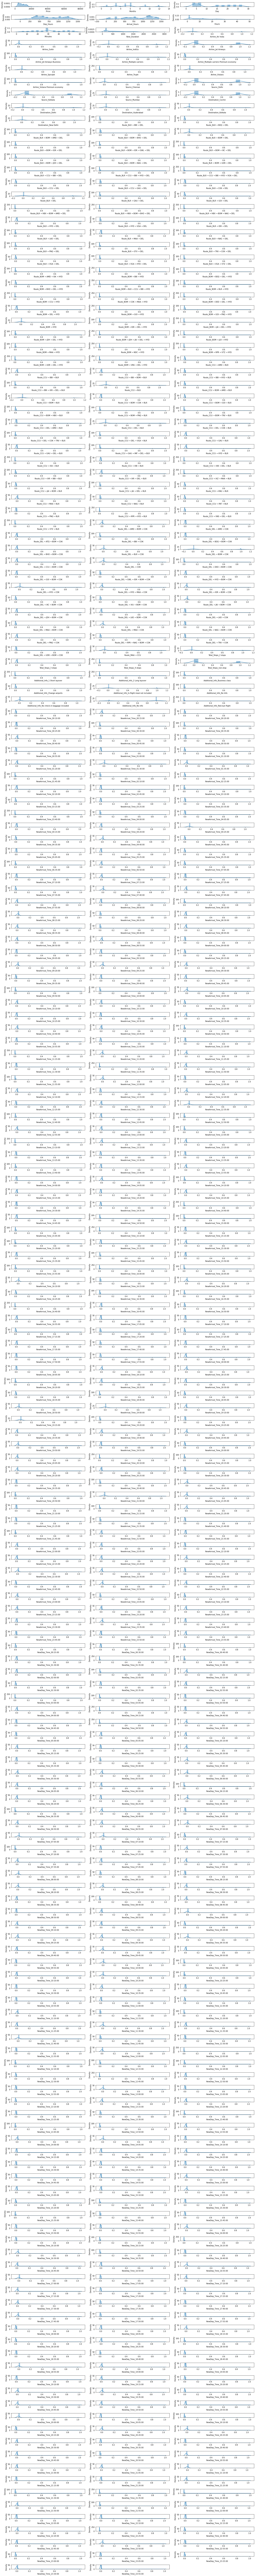

In [66]:
print('---------------------')
print('Distribution Plot :- ')
print('---------------------')
      
plt.figure(figsize = (20,200))
plotnumber = 1

for column in df:
    if plotnumber <=612:
        ax = plt.subplot(204,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber +=1
plt.tight_layout()

#### Data distribution is fine

### Spliting Dataset into features and label

In [52]:
x = df.drop('Price', axis = 1)
y = df. Price
print('Data has been splited')

Data has been splited


### Data Scaling

In [53]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.84449021,  1.30058442,  1.6535541 , ..., -0.02792495,
        -0.07338815, -0.04940576],
       [-1.5108275 , -0.86370566, -1.23194285, ..., -0.02792495,
        -0.07338815, -0.04940576],
       [ 1.15452169, -0.74979565, -0.60529453, ..., -0.02792495,
        -0.07338815, -0.04940576],
       ...,
       [-0.51132156,  1.64231443, -0.79474635, ..., -0.02792495,
        -0.07338815, -0.04940576],
       [-1.5108275 , -1.09152567, -0.2409641 , ..., -0.02792495,
        -0.07338815, -0.04940576],
       [ 1.15452169, -0.86370566, -0.34297662, ..., -0.02792495,
        -0.07338815, -0.04940576]])

#### Data has been scaled

### Principal Component Analysis (PCA)

In [55]:
# Apply Principal component analysis (PCA) for reducing the dimensionality of datasets
pca = PCA()
y = pca.fit(x_scaled)

In [56]:
cum = np.cumsum(y.explained_variance_ratio_) * 100
cum

array([  1.12764128,   1.97239994,   2.69490397,   3.38022474,
         4.05037   ,   4.61876866,   5.14470017,   5.64520599,
         6.12924935,   6.60073593,   7.06348454,   7.51943089,
         7.96884932,   8.40503131,   8.83789195,   9.25983303,
         9.67975248,  10.09335892,  10.49688597,  10.89689549,
        11.29506599,  11.6913374 ,  12.08311312,  12.47415835,
        12.86194954,  13.24683687,  13.6257352 ,  14.00427012,
        14.37986458,  14.75352753,  15.12574933,  15.49240962,
        15.85765755,  16.22237518,  16.58388494,  16.94506021,
        17.30400518,  17.65992184,  18.01427273,  18.3678905 ,
        18.71921865,  19.06793614,  19.41545518,  19.76159872,
        20.10447837,  20.44471108,  20.78442251,  21.1228056 ,
        21.45985954,  21.79478397,  22.12847437,  22.45909544,
        22.78911344,  23.11761827,  23.44578469,  23.77387074,
        24.1017136 ,  24.42856542,  24.75367323,  25.07844129,
        25.40197669,  25.72510763,  26.04692176,  26.36

In [58]:
com = np.argmax(cum>95)
print('No of component 95% variance =============>', com)

No of component 95% variance =============> 427


### Creating final y after applying PCA

In [59]:
finalpca = PCA(n_components = 427)
finaly = finalpca.fit_transform(x_scaled)

In [60]:
finaly

array([[ 3.51314844, -0.17018784, -0.06430584, ..., -0.05709627,
        -0.14252659, -0.0893445 ],
       [-0.45535096,  1.27267604,  0.7398327 , ...,  0.29337943,
         0.33420604, -0.67855649],
       [-3.50611894,  0.29712747,  0.12121879, ..., -1.49796411,
        -2.28767176, -1.10542289],
       ...,
       [ 2.84762538, -0.24479792,  0.56047461, ...,  0.01074633,
        -0.42086207, -0.28844677],
       [ 2.43889761, -0.20300657, -0.01720638, ...,  0.73019607,
        -0.94856549,  0.03196612],
       [-2.98985542, -1.85662044,  0.33608019, ...,  0.83042165,
         0.12620992,  1.13565498]])

In [61]:
y_new = pd.DataFrame(finaly)
y_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426
0,3.513148,-0.170188,-0.064306,-2.801243,0.150762,-0.758220,3.026725,1.571326,-0.927619,0.144227,-0.900415,0.852938,-3.751374,-0.562542,1.566676,-0.406224,0.113497,0.620693,-0.053028,-0.191728,-0.716081,1.089079,-0.325917,-0.477036,0.067524,-0.665091,-0.300895,-0.235032,1.379908,0.307493,-0.969318,0.498356,-1.490092,0.521656,-0.024131,-1.243161,0.058669,0.905201,-0.152492,-1.196525,-1.543261,1.339986,1.901954,0.691462,0.184956,0.581472,-4.176218,1.867852,-0.542195,1.326435,1.347759,-3.021471,1.986945,-2.980356,1.927184,-3.120861,1.160916,-0.719993,-0.632779,2.227085,-1.833656,0.593093,0.648623,-5.590538,-2.431654,6.975296,3.304165,0.356049,0.840101,-3.231906,3.068544,1.435843,0.378263,1.193463,2.740873,-0.000761,-0.847608,-1.861778,0.328927,-0.706080,0.266691,1.697956,-0.834386,-0.803235,0.363589,-1.131756,1.120298,-0.406708,-0.861816,-0.473358,-0.109514,0.454472,-0.099607,-1.046899,-0.689652,-0.522403,0.749944,-0.338221,-0.163699,-0.522027,0.808568,1.203832,0.599512,0.167822,0.768166,-0.139575,-0.323377,0.670674,-0.300065,-0.373894,-0.494329,0.627666,-0.201853,-0.304919,-0.232696,-0.685978,-1.436348,-0.906534,-1.166773,0.474086,0.140387,0.248829,-1.157471,-0.424367,0.075598,0.622802,-1.809916,0.874738,-0.916144,0.252622,-1.175942,0.548267,-0.187964,-1.019687,-0.080707,-0.342317,1.009038,-0.984870,-0.314485,1.195194,-0.272698,-0.254700,-0.373140,0.183782,0.318137,0.112285,-1.622198,-0.849972,-0.554880,0.408011,0.448119,0.171744,-0.342463,0.099500,0.564775,1.187089,0.083176,0.165418,-0.780799,0.685232,0.682874,0.657566,0.896915,-1.068976,-0.005590,-0.061341,1.179436,-1.171974,-0.154163,0.960259,0.206984,0.161274,-0.560467,-0.482833,-0.462803,-0.265879,-0.656906,-0.328580,0.600584,0.237649,0.054512,-0.598657,-0.755584,0.112181,-0.429742,-1.226164,0.213648,1.287619,-1.451160,0.116627,1.142445,-0.640641,-1.808462,-0.562966,-0.909481,-0.819282,-0.094670,0.306724,0.471104,-1.545775,-2.934264,0.644867,-0.960426,0.902683,0.190706,-0.954610,1.039605,-0.876018,-0.775858,-0.398165,0.629894,0.789437,3.508588,0.636345,1.341227,-1.001193,-1.153659,0.807480,0.472783,0.644685,-1.469974,1.296919,0.089766,-1.099374,-3.204807,-1.340711,-1.903435,-6.008065,2.120020,0.196314,0.859341,-2.008625,-5.501729,-1.433342,2.439716,-2.228779,-0.344225,0.179501,10.297615,-4.178730,-0.394638,-2.523379,-1.017709,3.991850,2.037717,6.739937,-3.273044,-1.977644,2.082327,-3.345152,1.613707,-2.332

### Split data into train and test. Model will be bulit on training data and tested on test data

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y_new, test_size = 0.25, random_state = 355)
print('Data has been splited.')

Data has been splited.


## Model Bulding

### Decision Tree model instantiaing, training and evaluating

In [72]:
bag_dt = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 15, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [73]:
bag_dt.oob_score

True

In [74]:
bag_dt.fit(x_train, y_train)
print('Bagging DT score ------->', bag_dt.score(x_test, y_test))

ValueError: operands could not be broadcast together with shapes (4685,) (4685,427) (4685,) 

In [77]:
x_train.shape

(7700, 610)

In [78]:
y_train.shape

(7700, 427)

In [79]:
x_test.shape

(2567, 610)

In [80]:
y_test.shape

(2567, 427)

In [81]:
x.shape

(10267, 610)

In [82]:
y.shape

AttributeError: 'PCA' object has no attribute 'shape'